# Precision-recall curves and Spearman correlation on ScRNA-seq

Nuha BinTayyash, 2020

This notebook shows the precision-recall curves and Spearman correlation scores resulted from running [DESeq2](https://bioconductor.org/packages/release/bioc/html/DESeq2.html) R package and GPcounts one sample test with negative binomial and Gaussian likelihoods on ScRNA-seq gene expression data in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats
from IPython.display import display

To normalize ScRNA-seq gene expression data in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset and to run one sample test using [DESeq2](https://bioconductor.org/packages/release/bioc/html/DESeq2.html) R package run DESeq2_scRNA_seq.Rmd R notebook

In [2]:
DESeq2 = pd.read_csv('../data/alpha_DESeq2.csv',index_col=[0])
print(DESeq2.shape)

(18274, 6)


\* Note that all negative log likelihood ratios are set to zero

In [3]:
GPcounts_NB = pd.read_csv('../data/ll_Negative_binomial_normalized_alpha_counts.csv',index_col=[0])
GPcounts_G = pd.read_csv('../data/ll_Gaussian_normalized_alpha_counts.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(18274, 3)
(18274, 3)


Remove NaNs from DESeq2 results 

In [4]:
nan_gene = list(DESeq2[DESeq2['padj'].isnull()].index.values)
DESeq2 = DESeq2.drop(nan_gene)
DESeq2.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001,123.914854,-1.450563,0.332834,20.681661,0.000005,0.000102
ENSMUSG00000000028,8.918803,-4.498371,1.855694,6.261511,0.012339,0.069156
ENSMUSG00000000031,0.515605,0.154787,1.565667,0.005131,0.942894,0.984825
ENSMUSG00000000037,1.468900,-2.194759,2.309940,1.013488,0.314069,0.606066
ENSMUSG00000000049,0.479602,-4.598312,4.380796,1.909780,0.166988,0.425824


In [5]:
GPcounts_NB = GPcounts_NB.drop(nan_gene)
GPcounts_NB

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000001,-1878.607007,-1886.426437,7.819430
ENSMUSG00000000028,-310.960674,-312.491949,1.531276
ENSMUSG00000000031,-128.686494,-128.685865,0.000000
ENSMUSG00000000037,-164.352208,-164.352204,0.000000
ENSMUSG00000000049,-45.235383,-45.714519,0.479136
...,...,...,...
ENSMUSG00000102059,-673.636915,-674.774972,1.138057
ENSMUSG00000102070,-2509.662422,-2532.851699,23.189277
ENSMUSG00000102097,-328.205418,-328.205380,0.000000
ENSMUSG00000102101,-571.665489,-571.693336,0.027846


In [6]:
GPcounts_G = GPcounts_G.drop(nan_gene)
GPcounts_G.head()

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000001,-647.855596,-668.011537,20.155942
ENSMUSG00000000028,-529.117237,-535.982452,6.865215
ENSMUSG00000000031,-205.861448,-205.861245,0.000000
ENSMUSG00000000037,-368.759806,-369.672432,0.912626
ENSMUSG00000000049,-127.913691,-128.987922,1.074230


#### label genes as differentially expressed using DESeq2 padj score

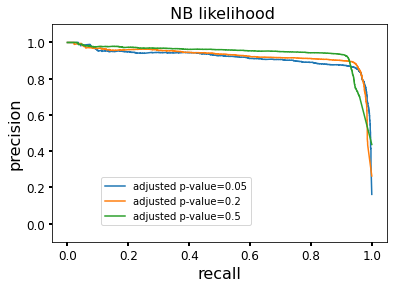

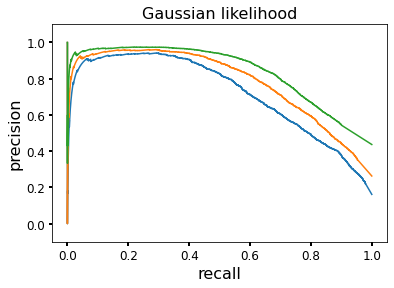

In [7]:
padj = [.05,.2,.5] # Threshold  
fig = plt.figure()

dfs = [GPcounts_NB['log_likelihood_ratio'],GPcounts_G['log_likelihood_ratio']]

for df in range(len(dfs)):
    D = len(DESeq2)
    for i in range(3):
        true_label = np.zeros(D)
  
        for j in range(D):
            # label gene as differentially expressed if DESeq2 give it a score lower than the threshold
            if DESeq2['padj'][j] <= padj[i]:
                true_label[j] = 1 
        labels = pd.DataFrame(true_label, index =DESeq2.index.values, columns =['label'])
        
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])

        plt.plot( recall,precision,label='adjusted p-value='+str(padj[i]))
        plt.tick_params(labelsize='large', width=2) 
        
        plt.xlabel('recall',fontsize=16)
        plt.ylabel('precision', fontsize=16)
        
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(.61, .32))
            title = ' NB likelihood'
        
        else:
            title = 'Gaussian likelihood'
           
        plt.title(title,fontsize=16)
        plt.ylim([-.1,1.1])
        
    plt.show()


### Corrolate DESeq2 with GPcounts with NB likelihood

DESeq2 and GPcounts with NB likelihood identify similar top 4 genes

In [8]:
DESeq_sorted = DESeq2.sort_values(by=['padj'])
display(DESeq_sorted.head())
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
display(GPcounts_NB_sorted.head())
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
display(GPcounts_G_sorted.head())

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000394,338406.987012,2.924096,0.092345,848.511483,1.531699e-186,2.419165e-182
ENSMUSG00000023944,1336.307294,-1.948810,0.085680,574.353175,6.344396e-127,5.010170e-123
ENSMUSG00000040856,21.171989,-11.540402,0.489058,424.702760,2.311257e-94,1.216800e-90
ENSMUSG00000021270,380.144931,-2.526495,0.137592,376.412803,7.515536e-84,2.967509e-80
ENSMUSG00000027419,4779.955765,1.505738,0.076123,356.010722,2.080899e-79,6.573143e-76


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000394,-4231.990874,-4451.189403,219.198529
ENSMUSG00000023944,-2420.093485,-2587.806608,167.713122
ENSMUSG00000021270,-2124.670688,-2250.920953,126.250265
ENSMUSG00000040856,-759.272905,-884.484654,125.211750
ENSMUSG00000027447,-2404.743861,-2526.950594,122.206733


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000027074,950.245073,-55.321005,1005.566079
ENSMUSG00000022821,762.541986,-75.123906,837.665892
ENSMUSG00000032315,611.513734,-18.371102,629.884836
ENSMUSG00000038151,473.611213,-123.377943,596.989156
ENSMUSG00000060613,422.814837,-134.169694,556.984531


In [9]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10 # cut a percentage from the dataset
# index of genes ranked by padj from DESeq2
DESeq_index = list(DESeq_sorted.index.values) 
# index of genes ranked by log likelihood ratio from GPcounts with NB likelihood
GPcounts_NB_index = list(GPcounts_NB_sorted.index.values) 
# index of genes ranked by log likelihood ratio from GPcounts with Gaussian likelihood
GPcounts_G_index = list(GPcounts_G_sorted.index.values)

corr_NB = [] # correlation score  between DEseq2 rank and GPcounts_NB rank
corr_G = [] # correlation score  between DEseq2 rank and GPcounts_Gaussian rank

for count in range(10):
    print('Correlation score at:'+str(percentage[count])+' of the dataset:')
    # cut a percentage from the indexes
    DESeq_index_part= DESeq_index[int(len(DESeq_index) * .0) : int(len(DESeq_index) * percentage[count])]
    GPcounts_NB_rank_part = []
    GPcounts_G_rank_part = []
    for i in DESeq_index_part:
        # locate gene from DESeq rank in GPcounts rank to correlate ranking
        GPcounts_NB_rank_part.append(GPcounts_NB_index.index(i))
        GPcounts_G_rank_part.append(GPcounts_G_index.index(i))
    
    DESeq_rank_part = list(range(0,len(DESeq_index_part)))
   
    rho, pval = stats.spearmanr(DESeq_rank_part,GPcounts_NB_rank_part)
    print('NB likelihood',rho)
    corr_NB.append(rho)
    
    print('Gaussian likelihood',rho)
    rho, pval = stats.spearmanr(DESeq_rank_part,GPcounts_G_rank_part)
    corr_G.append(rho)
   

Correlation score at:0.1 of the dataset:
NB likelihood 0.918935556907372
Gaussian likelihood 0.918935556907372
Correlation score at:0.2 of the dataset:
NB likelihood 0.9188816337881559
Gaussian likelihood 0.9188816337881559
Correlation score at:0.30000000000000004 of the dataset:
NB likelihood 0.9159717960132727
Gaussian likelihood 0.9159717960132727
Correlation score at:0.4 of the dataset:
NB likelihood 0.9140703823055687
Gaussian likelihood 0.9140703823055687
Correlation score at:0.5 of the dataset:
NB likelihood 0.9063301906062045
Gaussian likelihood 0.9063301906062045
Correlation score at:0.6000000000000001 of the dataset:
NB likelihood 0.906905974022614
Gaussian likelihood 0.906905974022614
Correlation score at:0.7000000000000001 of the dataset:
NB likelihood 0.8882472909213892
Gaussian likelihood 0.8882472909213892
Correlation score at:0.8 of the dataset:
NB likelihood 0.8637321794310125
Gaussian likelihood 0.8637321794310125
Correlation score at:0.9 of the dataset:
NB likelihood

Plot Spearman correlation score with the percentage of the dataset

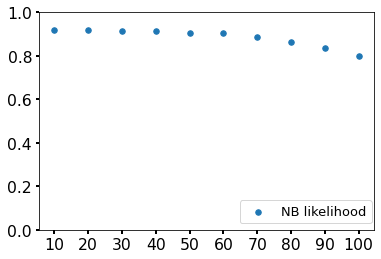

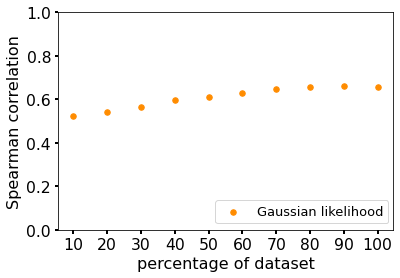

In [10]:
plt.rcParams.update({'font.size': 13})
plt.xticks(percentage*100)
plt.ylim(0.,1.)
plt.tick_params(labelsize='large', width=2)  

plt.scatter(percentage*100,corr_NB,s=30,label = 'NB likelihood')
plt.legend(bbox_to_anchor=(.58, 0), loc='lower left', ncol=1)
plt.show()

plt.xticks(percentage*100)
plt.scatter(percentage*100,corr_G,s=30,color = 'darkorange',label = 'Gaussian likelihood')

plt.xlabel('percentage of dataset', fontsize=16)
plt.ylabel('Spearman correlation', fontsize=16)
plt.ylim(0.,1.)
plt.tick_params(labelsize='large', width=2)  
plt.legend(bbox_to_anchor=(.45, 0), loc='lower left', ncol=1)
plt.show()

In [11]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10 # cut a percentage from the dataset

# index of genes ranked by log likelihood ratio from GPcounts with NB likelihood
GPcounts_NB_index = list(GPcounts_NB_sorted.index.values) 
# index of genes ranked by log likelihood ratio from GPcounts with Gaussian likelihood
GPcounts_G_index = list(GPcounts_G_sorted.index.values)

corr_G = [] # correlation score  between GPcounts_NB rank and GPcounts_Gaussian rank

for count in range(10):
    print('Correlation score at:'+str(percentage[count])+' of the dataset:')
    # cut a percentage from the indexes
    GPcounts_NB_index_part= GPcounts_NB_index[int(len(GPcounts_NB_index) * .0) : int(len(GPcounts_NB_index) * percentage[count])]
    GPcounts_G_rank_part = []
    
    for i in GPcounts_NB_index_part:
        # locate gene from DESeq rank in GPcounts rank to correlate ranking
        GPcounts_G_rank_part.append(GPcounts_G_index.index(i))
    
    GPcounts_NB_rank_part = list(range(0,len(GPcounts_NB_index_part)))
    
    rho, pval = stats.spearmanr(GPcounts_NB_rank_part,GPcounts_G_rank_part)
    corr_G.append(rho)
    print('Gaussian likelihood',rho)

Correlation score at:0.1 of the dataset:
Gaussian likelihood 0.47361426259239553
Correlation score at:0.2 of the dataset:
Gaussian likelihood 0.4772717796346006
Correlation score at:0.30000000000000004 of the dataset:
Gaussian likelihood 0.4859789091548417
Correlation score at:0.4 of the dataset:
Gaussian likelihood 0.5288351923112701
Correlation score at:0.5 of the dataset:
Gaussian likelihood 0.5740735516100635
Correlation score at:0.6000000000000001 of the dataset:
Gaussian likelihood 0.6181543097179112
Correlation score at:0.7000000000000001 of the dataset:
Gaussian likelihood 0.6447210533676103
Correlation score at:0.8 of the dataset:
Gaussian likelihood 0.6285885474344675
Correlation score at:0.9 of the dataset:
Gaussian likelihood 0.6047951209357452
Correlation score at:1.0 of the dataset:
Gaussian likelihood 0.583646001363148


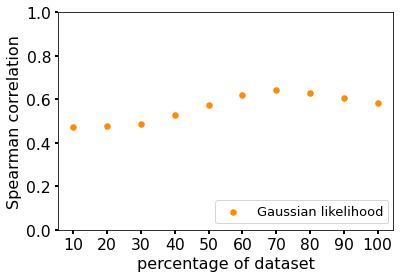

In [12]:
plt.rcParams.update({'font.size': 13})
plt.xticks(percentage*100)
plt.scatter(percentage*100,corr_G,s=30,color = 'darkorange',label = 'Gaussian likelihood')

plt.xlabel('percentage of dataset', fontsize=16)
plt.ylabel('Spearman correlation', fontsize=16)
plt.ylim(0.,1.)
plt.tick_params(labelsize='large', width=2)
plt.legend(bbox_to_anchor=(.45, 0), loc='lower left', ncol=1)
plt.show()